In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Q5

## Load and preprocess dataset

In [4]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Nv3Pk3L9MTWyK453XzVLq8OUolaECai4

Downloading...
From: https://drive.google.com/uc?id=1Nv3Pk3L9MTWyK453XzVLq8OUolaECai4
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 52.7MB/s]


In [5]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values

In [6]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
imputer_num = SimpleImputer(strategy="median")
data['Age'] = imputer_num.fit_transform(pd.DataFrame(data['Age'])).ravel()

imputer_cat = SimpleImputer(strategy="most_frequent")
data['Embarked'] = imputer_cat.fit_transform(pd.DataFrame(data['Embarked'])).ravel()
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Delete unusable columns

In [8]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Categorical features

In [9]:
data.columns = data.columns.str.strip()
cat_cols = data.select_dtypes(include=["object"]).columns

data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### Train test split

In [10]:
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, stratify=y)

## Tree with depth = 4

In [11]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=93)
tree_4.fit(X_train, y_train)

y_train_pred_4 = tree_4.predict(X_train)
y_test_pred_4  = tree_4.predict(X_test)

print("=== Decision Tree (max_depth=4) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_4))
print("Test  Accuracy:", accuracy_score(y_test,  y_test_pred_4))
print("Node count:", tree_4.tree_.node_count)
print("Max depth :", tree_4.tree_.max_depth)

=== Decision Tree (max_depth=4) ===
Train Accuracy: 0.8300561797752809
Test  Accuracy: 0.8491620111731844
Node count: 27
Max depth : 4


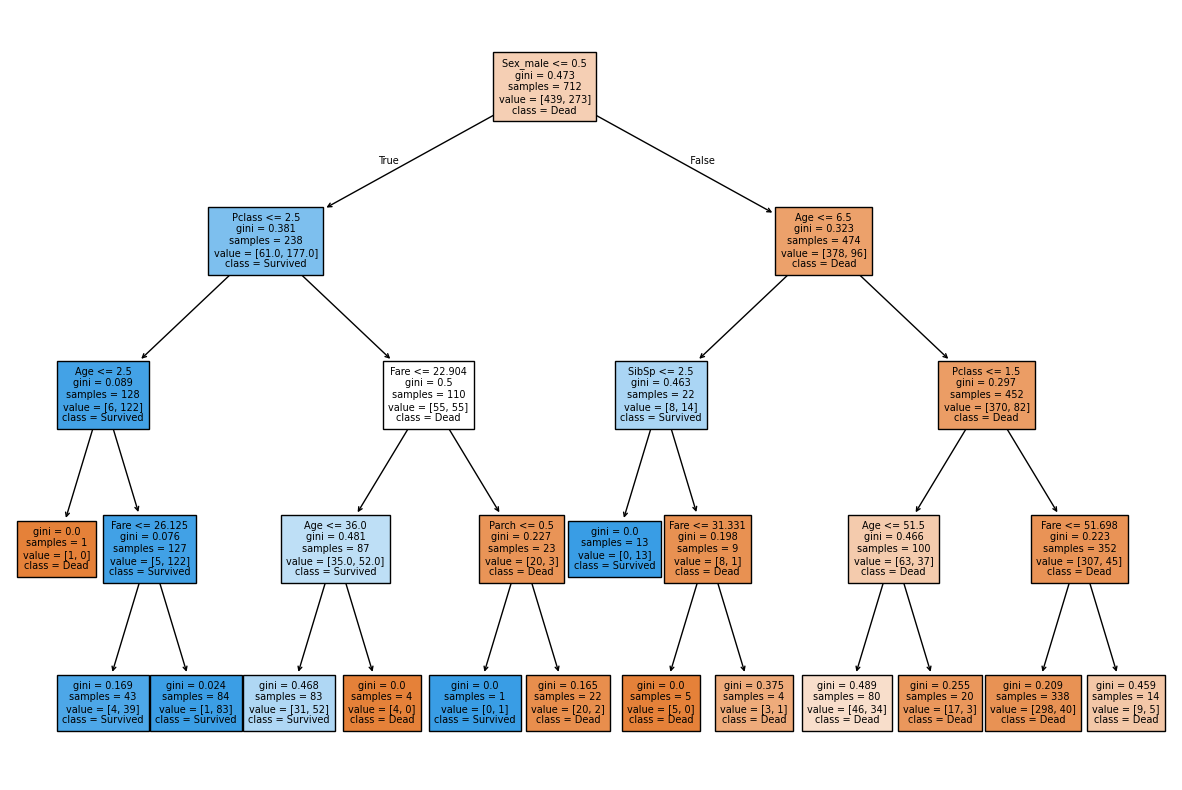

In [12]:
plt.figure(figsize=(15, 10))
plot_tree(
    tree_4,
    feature_names=X.columns,
    class_names=["Dead", "Survived"],
    filled=True,
    fontsize=7
)
plt.show()

# Q6

## Full tree without depth

In [13]:
full_tree = DecisionTreeClassifier(max_depth=None, random_state=93)
full_tree.fit(X_train, y_train)

y_train_pred_full = full_tree.predict(X_train)
y_test_pred_full  = full_tree.predict(X_test)

print("=== Full Decision Tree (max_depth=None) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_full))
print("Test  Accuracy:", accuracy_score(y_test,  y_test_pred_full))
print("Node count:", full_tree.tree_.node_count)
print("Max depth :", full_tree.tree_.max_depth)

=== Full Decision Tree (max_depth=None) ===
Train Accuracy: 0.9859550561797753
Test  Accuracy: 0.7877094972067039
Node count: 329
Max depth : 23


### Decission tree with different depths


=== max_depth = 3 ===
Train Accuracy: 0.8230337078651685
Test  Accuracy: 0.8379888268156425

=== max_depth = 5 ===
Train Accuracy: 0.8384831460674157
Test  Accuracy: 0.8379888268156425

=== max_depth = 10 ===
Train Accuracy: 0.9101123595505618
Test  Accuracy: 0.8547486033519553

=== max_depth = None ===
Train Accuracy: 0.9859550561797753
Test  Accuracy: 0.776536312849162


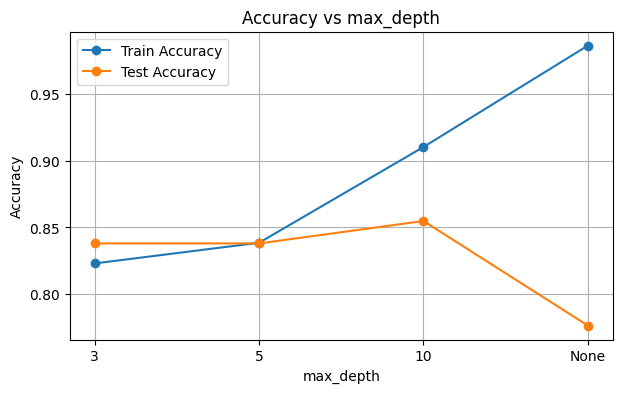

In [14]:
depth_list = [3, 5, 10, None]
train_accs, test_accs = [], []

for d in depth_list:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc  = accuracy_score(y_test,  clf.predict(X_test))

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"\n=== max_depth = {d} ===")
    print("Train Accuracy:", train_acc)
    print("Test  Accuracy:", test_acc)

plt.figure(figsize=(7,4))
x_labels = [str(d) for d in depth_list]
plt.plot(x_labels, train_accs, marker='o', label="Train Accuracy")
plt.plot(x_labels, test_accs,  marker='o', label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs max_depth")
plt.legend()
plt.grid(True)
plt.show()

## Pure tree with Pruning Complexity-Cost

In [15]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas_pos = path.ccp_alphas[path.ccp_alphas > 0]
print("Positive alphas:", len(ccp_alphas_pos))

Positive alphas: 65


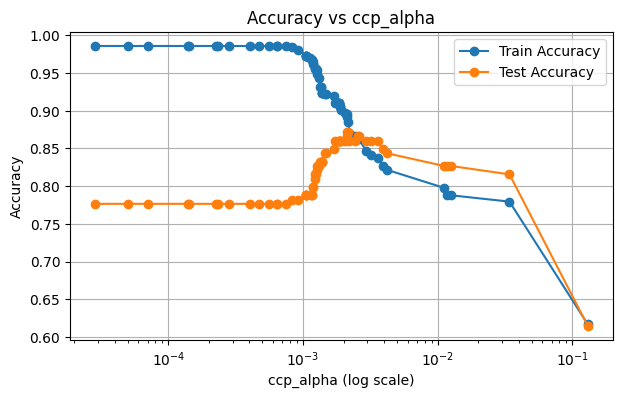

In [16]:
pruned_clfs = []
train_accs_pruned = []
test_accs_pruned  = []

for alpha in ccp_alphas_pos:
    clf_p = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_p.fit(X_train, y_train)

    pruned_clfs.append(clf_p)
    train_accs_pruned.append(accuracy_score(y_train, clf_p.predict(X_train)))
    test_accs_pruned.append(accuracy_score(y_test,  clf_p.predict(X_test)))

plt.figure(figsize=(7,4))
plt.plot(ccp_alphas_pos, train_accs_pruned, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas_pos, test_accs_pruned,  marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("ccp_alpha (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
best_idx = np.argmax(test_accs_pruned)
best_alpha = ccp_alphas_pos[best_idx]
best_pruned_tree = pruned_clfs[best_idx]

print("=== Best positive alpha ===")
print("best_alpha =", best_alpha)
print("Train Accuracy:", train_accs_pruned[best_idx])
print("Test  Accuracy:",  test_accs_pruned[best_idx])

print("\n========================================")
print("          Comparison Before/After Pruning")
print("Without pruning:")
print("  Node count:", full_tree.tree_.node_count)
print("  Max depth :", full_tree.tree_.max_depth)

print("\nAfter pruning:")
print("  Node count:", best_pruned_tree.tree_.node_count)
print("  Max depth :", best_pruned_tree.tree_.max_depth)

=== Best positive alpha ===
best_alpha = 0.002136309875813129
Train Accuracy: 0.8918539325842697
Test  Accuracy: 0.8715083798882681

          Comparison Before/After Pruning
Without pruning:
  Node count: 329
  Max depth : 23

After pruning:
  Node count: 71
  Max depth : 14


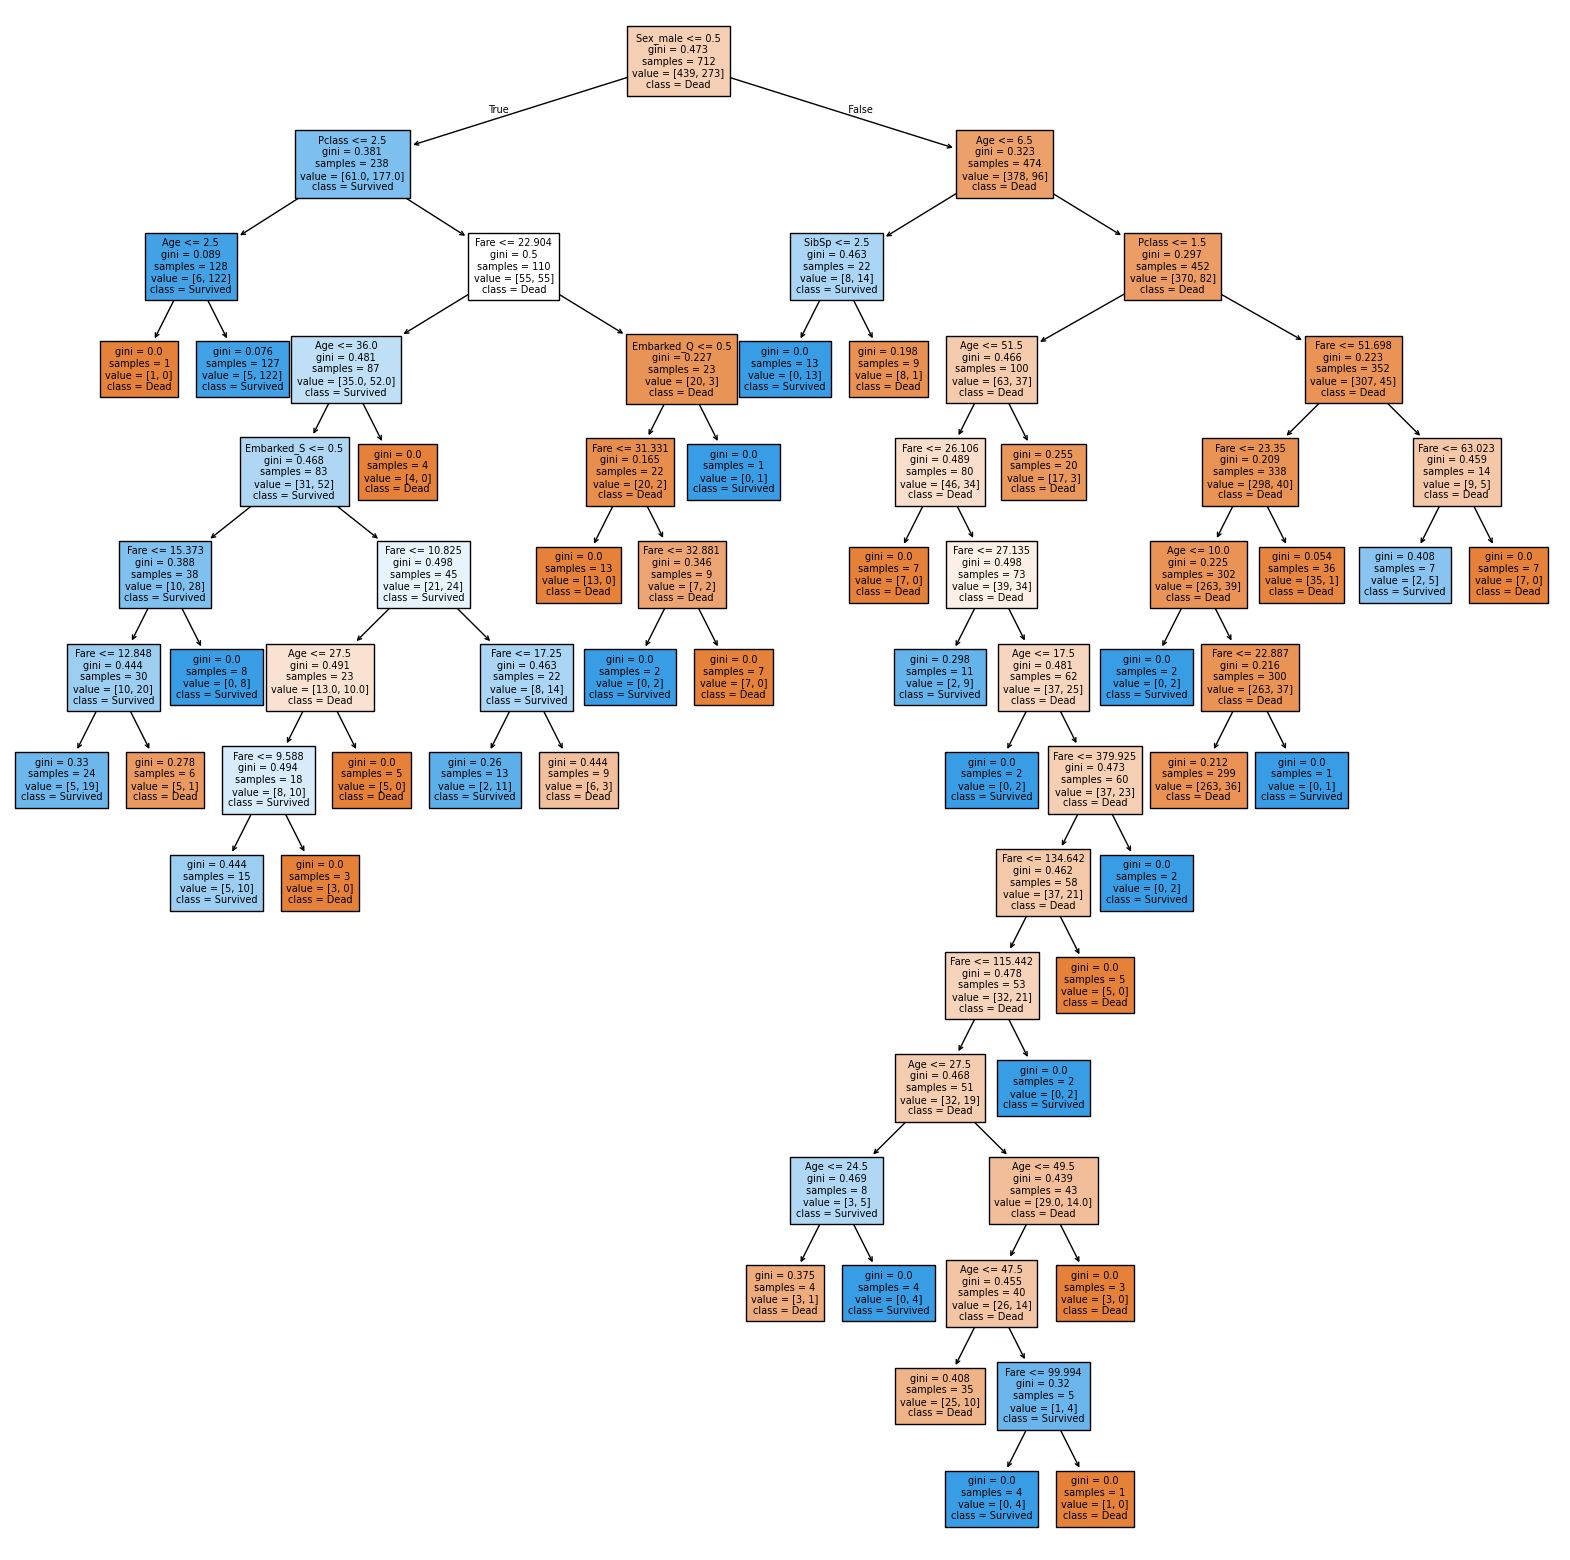

In [18]:
plt.figure(figsize=(20, 20))
plot_tree(
    best_pruned_tree,
    feature_names=X.columns,
    class_names=["Dead", "Survived"],
    filled=True,
    fontsize=7
)
plt.show()